In [280]:
import numpy as np
import matplotlib.pyplot as plt
from simulator import *
from controller import *
from extendedkalmanfilter import *
import scipy.misc
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [303]:
T = 4
# t = 1
# print x_desired(t,T)
# print u_desired(t,T)
x_des = lambda t: x_desired(t,T)
u_des = lambda t: u_desired(t,T)

sim = Simulator(dt, A, B ,h ,grad_h, W, R)
controller = Controller(x_des, u_des, 3*np.identity(2))
estimator = Estimator(A, B, W, R, dt, h, grad_h, useDummyEstimator=False)
sim.setEstimator(estimator)
sim.setController(controller)

In [282]:
t = 0
eps = np.array([0.1, 0.1])
controller.computeControlInput(x_des(t) + eps, t)

array([ 4.7, -0.3])

In [283]:
estimator.initialize(x_0, Q_0)
print estimator.x_current
print estimator.Q_current
print estimator.useDummyEstimator
print estimator.update(u_des(t), 0)

[0 0]
[[ 1.  0.]
 [ 0.  1.]]
True
(array([ 0.5,  0. ]), array([[ 1.01,  0.  ],
       [ 0.  ,  1.01]]))


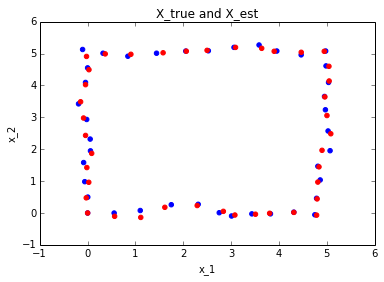

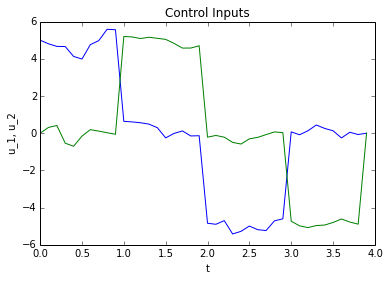

In [309]:
sim.simulate(x_0, Q_0, T, addNoise=True)
sim.plotSimResults(plot_x_est=True, plot_u=True)


In [301]:
# idx = 0
# h_temp = lambda x: h(x)[idx]
# numericalGradient =lambda x: scipy.misc.derivative(h_temp, x, dx=1e-4)
x_0 = np.array([0,0])
print h(x_0)
print grad_h(x_0)
print ""
print numericalGradient(h,x_0, dx=1e-5)
# print np.linalg.norm(np.array([10,10]))

[ 10.           0.          14.14213562   0.78539816  10.           1.57079633]
[[-1.         -0.        ]
 [-0.         -0.1       ]
 [-0.70710678 -0.70710678]
 [ 0.05       -0.05      ]
 [-0.         -1.        ]
 [ 0.1        -0.        ]]

[[-1.          0.        ]
 [ 0.         -0.1       ]
 [-0.70710678 -0.70710678]
 [ 0.05       -0.05      ]
 [ 0.         -1.        ]
 [ 0.1         0.        ]]


In [286]:
# plt.scatter(sim.simResults['x_true'][:,0], sim.simResults['x_true'][:,1])

In [296]:
print K

[[ 3.  0.]
 [ 0.  3.]]
